In [85]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

from imblearn.combine import SMOTETomek
#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
# from feature_engine.encoding import OneHotEncoder
# from feature_engine.encoding import OrdinalEncoder

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb
# import catboost as cb

#Feature Importance
# import shap

In [86]:
# !pip install feature_engine
# !pip install openpyxl
# !pip install statsmodels
# !pip install -U imbalanced-learn

In [87]:
#Dataset
Ecommerce_data = pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")
Ecommerce_data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [88]:
Ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [89]:
#printing null values in each column
Ecommerce_data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# later on see for not drooping null rows instead use fillna or other imputers

In [90]:
print("Before Dropping Missing values:", Ecommerce_data.isna().sum().sum())
Ecommerce_data.dropna(inplace=True)
print("After Dropping missing values: ",Ecommerce_data.isna().sum().sum())

Before Dropping Missing values: 1856
After Dropping missing values:  0


In [91]:
catagorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
numerical_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']



In [92]:
y = Ecommerce_data['Churn']
X = Ecommerce_data.drop(['Churn','CustomerID'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

Encoding catagorical columns

In [93]:
from sklearn.preprocessing import OrdinalEncoder
def Encoder_Function(encoder,X_train,X_test):
    encoder.fit(X_train)
    return encoder.transform(X_train),encoder.transform(X_test)

# ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary',variables='Gender')#ordinal_Encoder on Gender Column

# ohe_encoder = OneHotEncoder(variables=catagorical_columns) #ohe on all categorical columns

# X_train,X_test = Encoder_Function(ordinal_encoder,X_train,X_test)
# X_train,X_test = Encoder_Function(ohe_encoder,X_train,X_test)


# LabelEncoder

In [94]:

Encoded_data = Ecommerce_data[catagorical_columns]

label_Encoder = LabelEncoder()
Encoded_data = Encoded_data.apply(lambda x: label_Encoder.fit_transform(x))
Encoded_data = pd.concat([Encoded_data,Ecommerce_data[numerical_columns]],axis=1)
Encoded_data.head()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,2,2,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93
3,2,4,2,2,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07
5,0,4,4,2,0.0,22.0,3.0,5,5,2,22.0,4.0,6.0,7.0,139.19
11,1,4,0,2,11.0,6.0,3.0,4,3,10,13.0,0.0,1.0,0.0,153.81
12,2,1,3,2,0.0,11.0,2.0,3,3,2,13.0,2.0,2.0,2.0,134.41


Multicollinearity check

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
  
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = numerical_columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(Encoded_data[numerical_columns].values, i) for i in range(len(numerical_columns))] 
  
print(vif_data)

                        feature        VIF
0                        Tenure   2.571890
1               WarehouseToHome   4.249706
2                HourSpendOnApp  19.731450
3      NumberOfDeviceRegistered  15.546245
4             SatisfactionScore   5.580603
5               NumberOfAddress   4.112485
6   OrderAmountHikeFromlastYear  16.612475
7                    CouponUsed   4.541017
8                    OrderCount   5.749307
9             DaySinceLastOrder   3.761779
10               CashbackAmount  32.341320


In [96]:
Encoded_data.dtypes

PreferredLoginDevice             int32
PreferredPaymentMode             int32
PreferedOrderCat                 int32
MaritalStatus                    int32
Tenure                         float64
WarehouseToHome                float64
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
SatisfactionScore                int64
NumberOfAddress                  int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

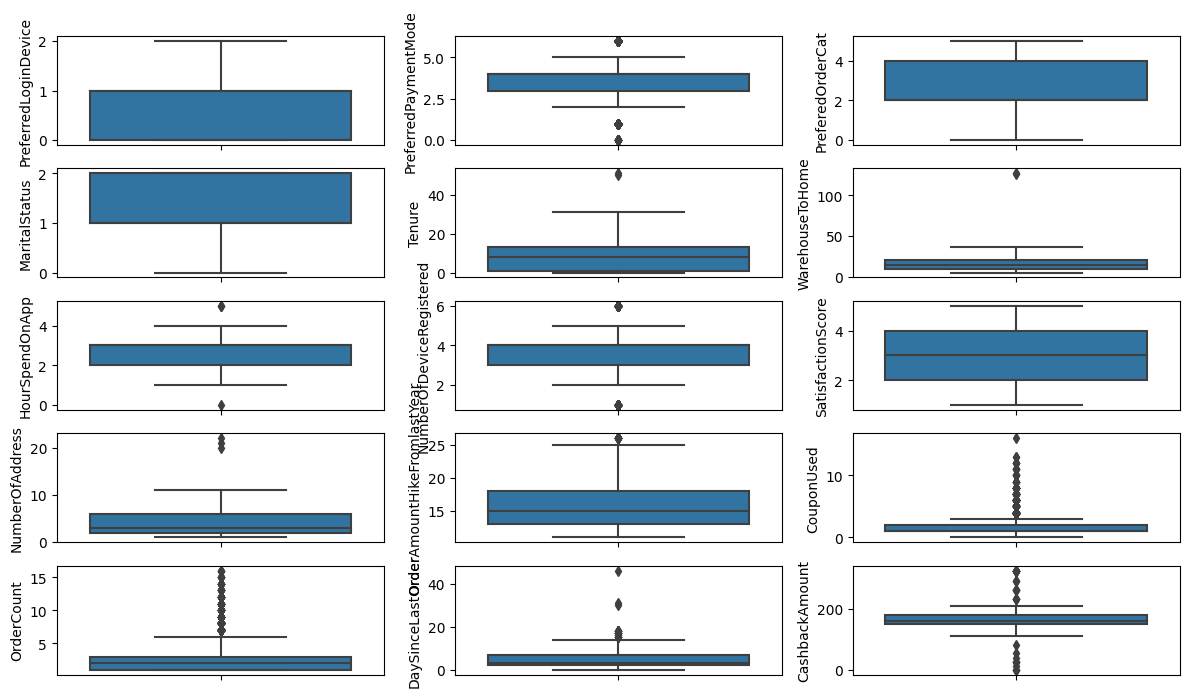

In [97]:
fig = plt.figure(figsize=(12,12))

for attribute in range(len(Encoded_data.columns)):
    fig.add_subplot(9,3,attribute+1)
    sns.boxplot(y=Encoded_data.iloc[:,attribute])

plt.tight_layout()
plt.show()

In [98]:
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [99]:
is_outlier = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in is_outlier:
    Encoded_data = handle_outliers(Encoded_data , col)

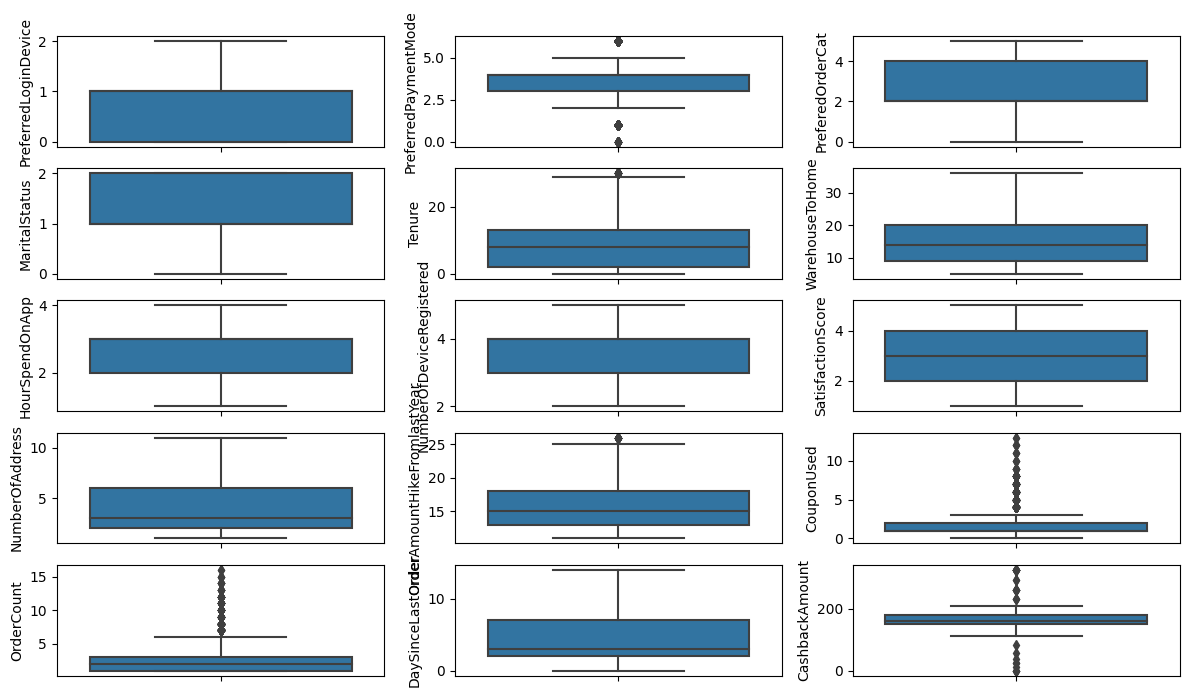

In [100]:
fig = plt.figure(figsize=(12,12))

for attribute in range(len(Encoded_data.columns)):
    fig.add_subplot(9,3,attribute+1)
    sns.boxplot(y=Encoded_data.iloc[:,attribute])

plt.tight_layout()
plt.show()

# Class Imbalancing

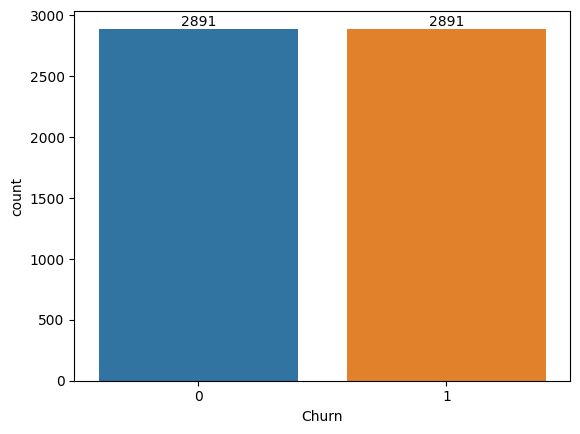

<Figure size 640x480 with 0 Axes>

In [101]:
Encoded_data['Churn']= Ecommerce_data.Churn
y = Encoded_data['Churn']
X = Encoded_data.drop('Churn', axis=1)
# Resampling
resample = SMOTETomek(random_state=42)
X_res, y_res = resample.fit_resample(X, y)

ax = sns.countplot(x=y_res)
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

# Storing in Dataframe

i am storing encoded data and in modeling part i am again doing scaling

In [103]:
resampled_data = pd.DataFrame(X_res, columns=X.columns)
resampled_data['Churn'] = y_res

# Save the resampled data to a file  CSV
resampled_data.to_csv('resampled_data.csv', index=False)

In [104]:
resampled_data.head()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn
0,1,4,2,2,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93,1
1,2,4,2,2,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07,1
2,0,4,4,2,0.0,22.0,3.0,5,5,2,22.0,4.0,6.0,7.0,139.19,1
3,1,4,0,2,11.0,6.0,3.0,4,3,10,13.0,0.0,1.0,0.0,153.81,1
4,2,1,3,2,0.0,11.0,2.0,3,3,2,13.0,2.0,2.0,2.0,134.41,1
